In [369]:
%matplotlib inline
import statsmodels.formula.api as sm

In [313]:
from __init__ import *
from rain import *
from common import *
from tools import *

In [3]:
path = './input/'

rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)
rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()

In [4]:
%load_ext autoreload

In [334]:
%aimport common
%aimport rain
%aimport tools

In [6]:
def get_fit(df, col, latlon=True, plot=False):
    df = df[['lon', 'lat', col]].dropna(how='any')
    df.columns = ['lon', 'lat', 'col']
    result = sm.ols(formula="col ~ lon + lat", data=df).fit()
    fit = result.params['Intercept'] + result.params['lon']*df.lon +result.params['lat']*df.lat
    if plot:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        for l, ax in zip(['lon', 'lat'], axes):
            ax.scatter(x=df[l], y=df.col)
            ax.scatter(df[l], fit, c='r')
            ax.set_ylabel('Rain Rate (mm/hr)')
            ax.set_xlabel(l)
            ax.set_title('Trend in ' + l)
    return fit

#### Rainiest

In [7]:
rg.get_rainiest(10, time_step='1H', base=0)
z = rg.rainiest[:]

#### Specific high POT times

In [325]:
df = pd.read_csv(path+'The flashiest watersheds in St. Louis_1122.txt', header=None,
                 nrows=20, skiprows=[0,7,14,21], delim_whitespace=True,parse_dates=True)
a=[]
for i in range(len(df)):
    a.append(pd.datetime(df.loc[i,0], df.loc[i,1], df.loc[i,2], df.loc[i,3], df.loc[i,4]))

tt = [t for t in a if rg.rate.index[0] < t < rg.rate.index[-1]]

z = rg.ll
for t in tt:
    z = z.join(rg.rate.loc[t-pd.DateOffset(hours=3):t+pd.DateOffset(hours=1)].transpose())

#### Either way, do some tweaking

In [326]:
z.X = z.X -z.X.min()
z.Y = z.Y -z.Y.min()

In [342]:
res = detrend(z, latlon=True)

#### Wanna check out what you've got?


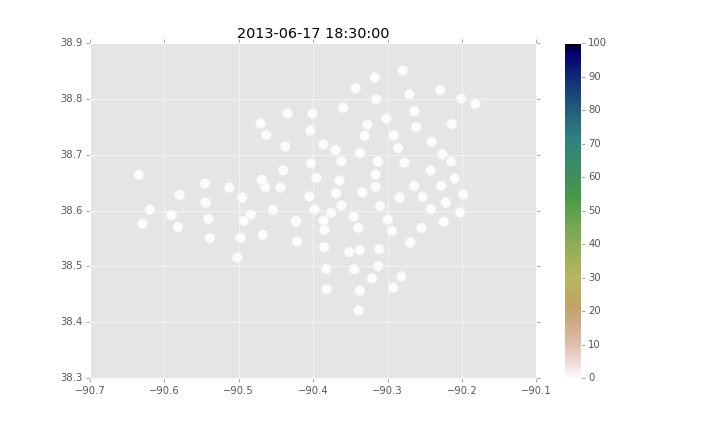
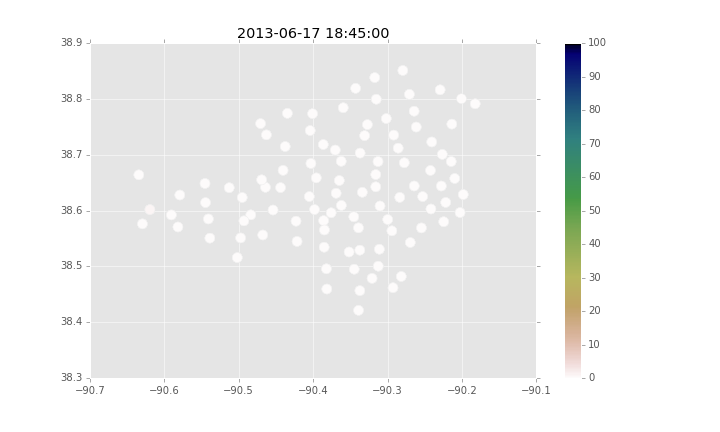
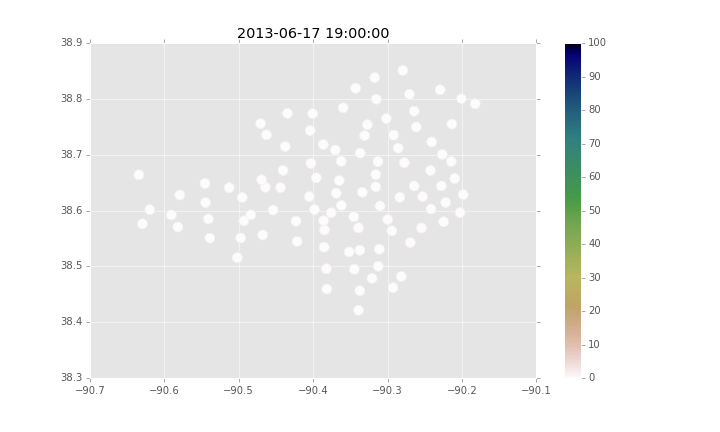
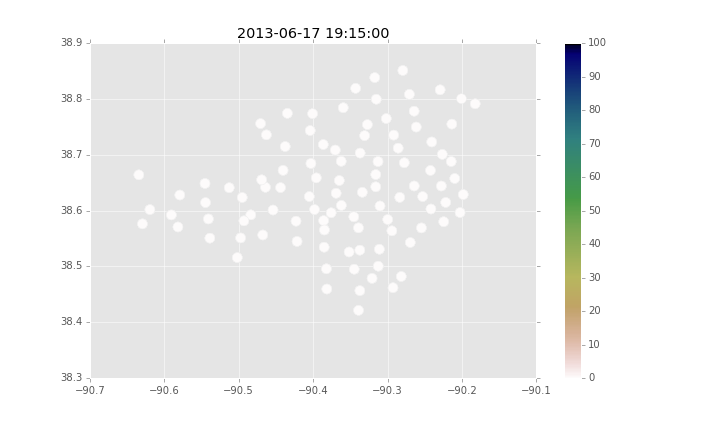
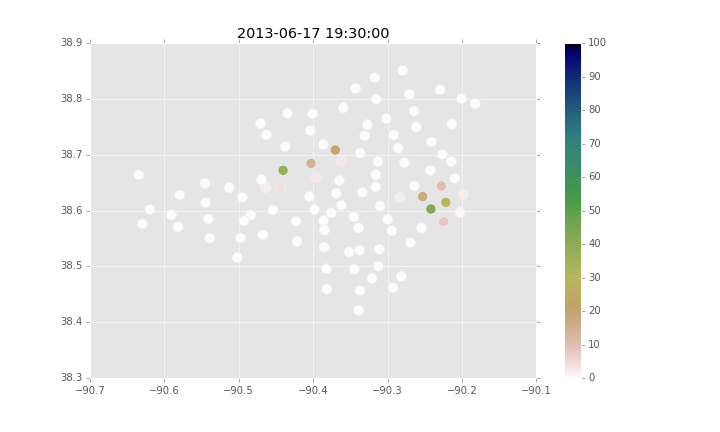
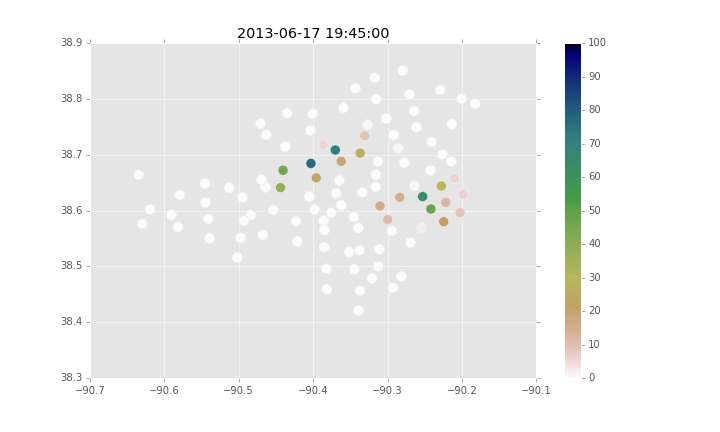
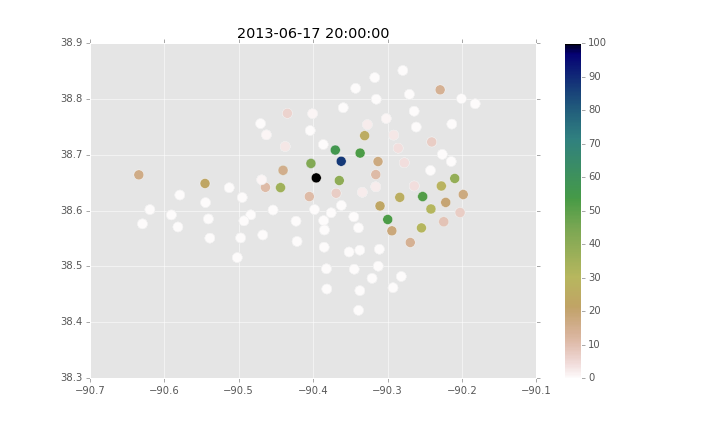
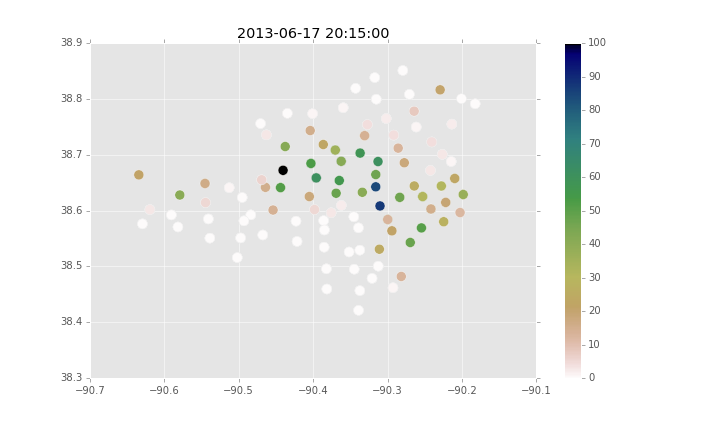
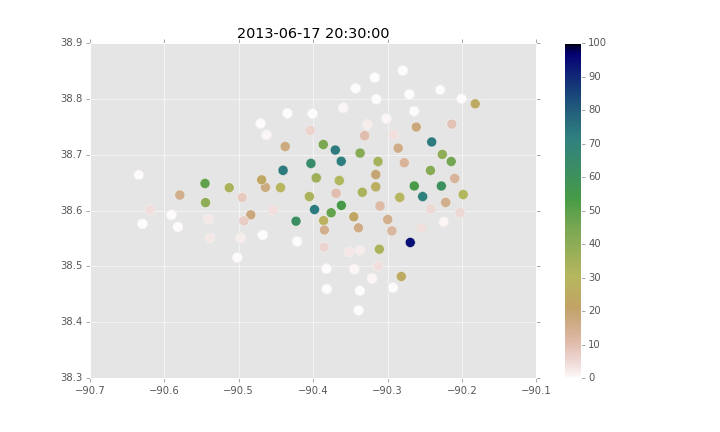
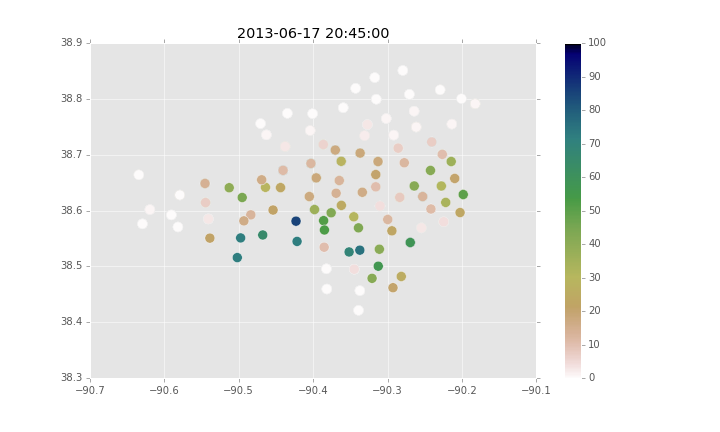
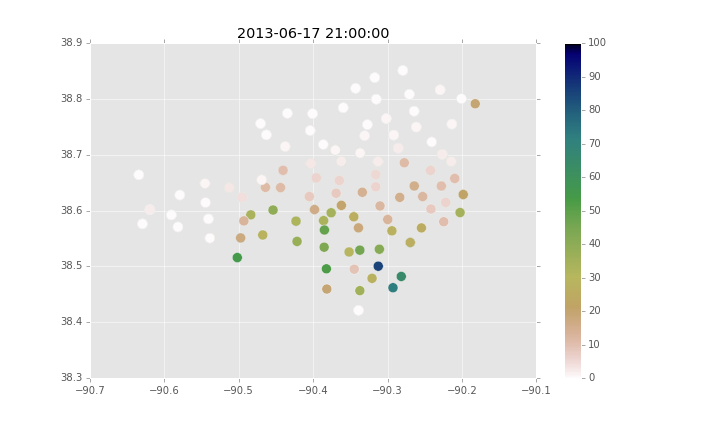
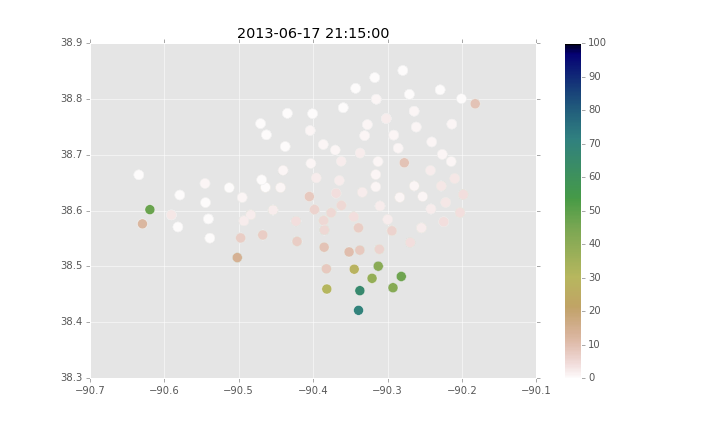
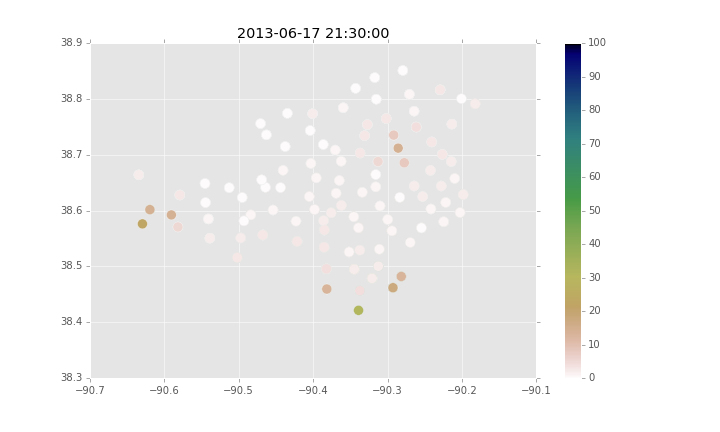
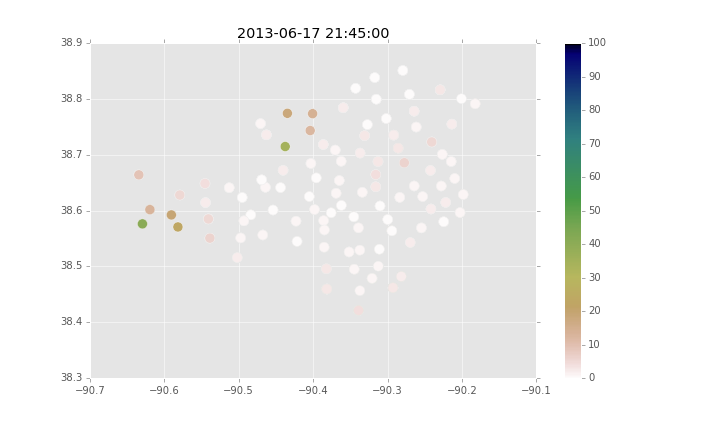
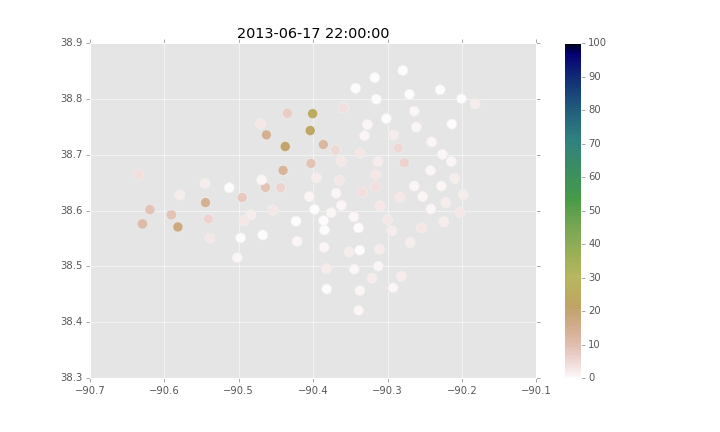
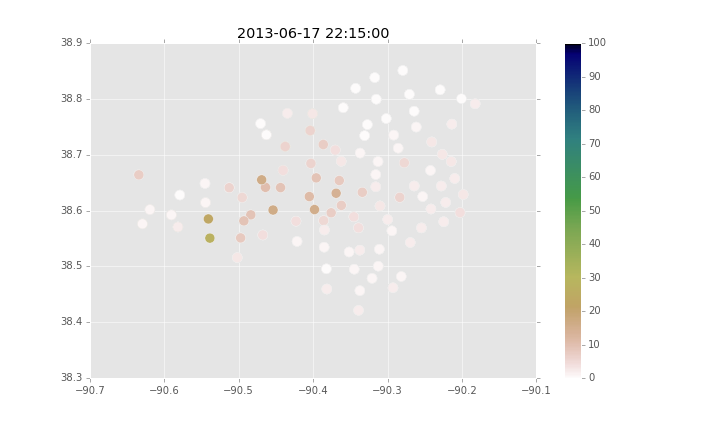
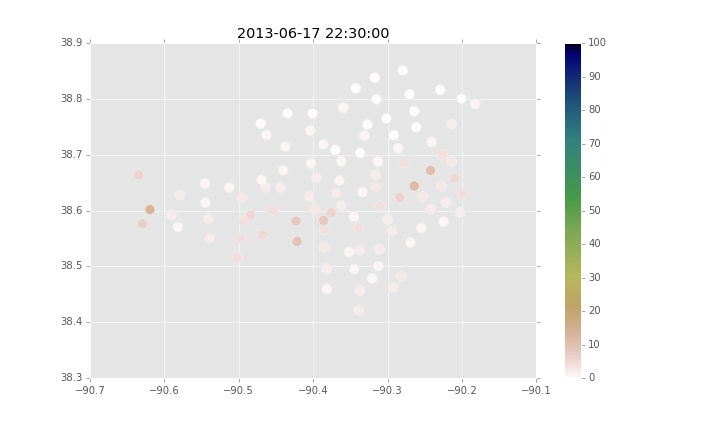
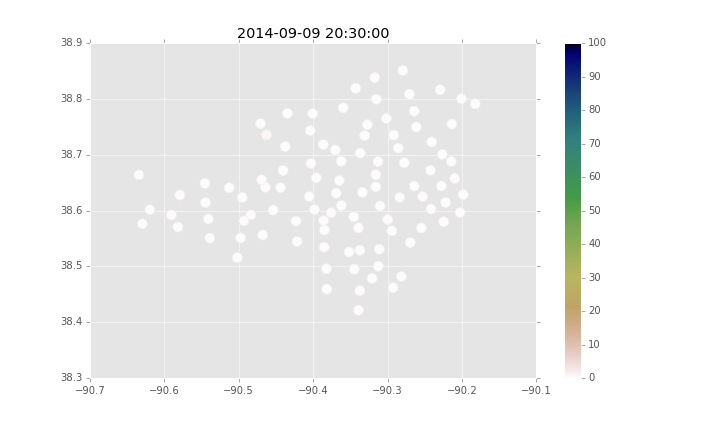
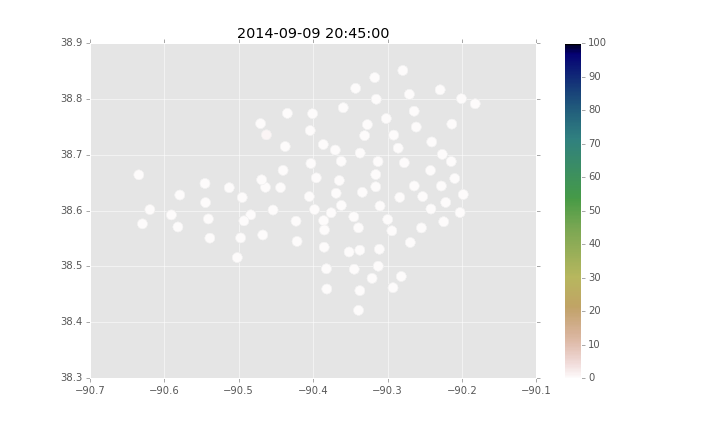
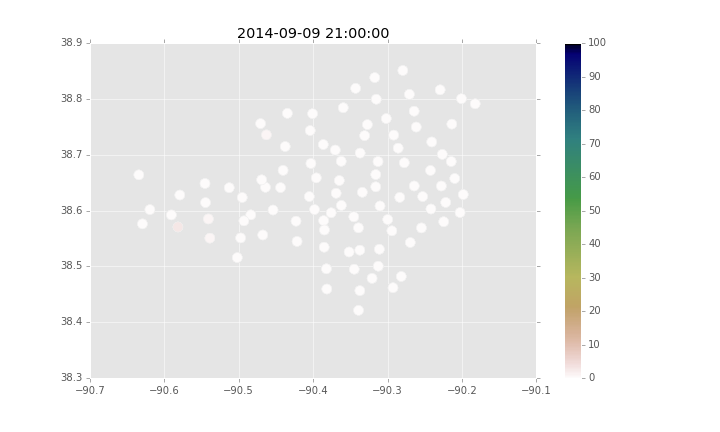
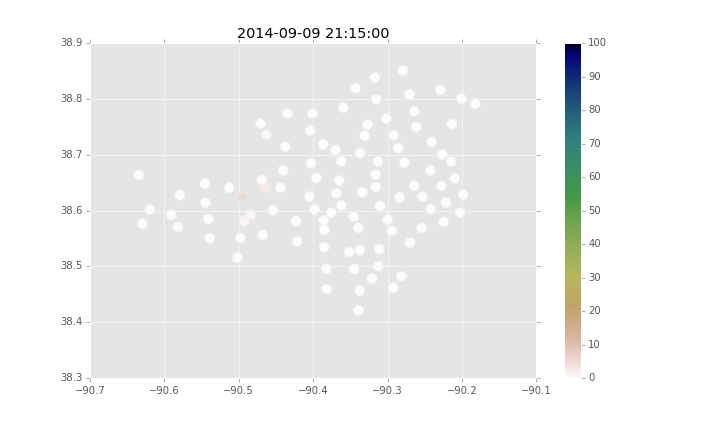
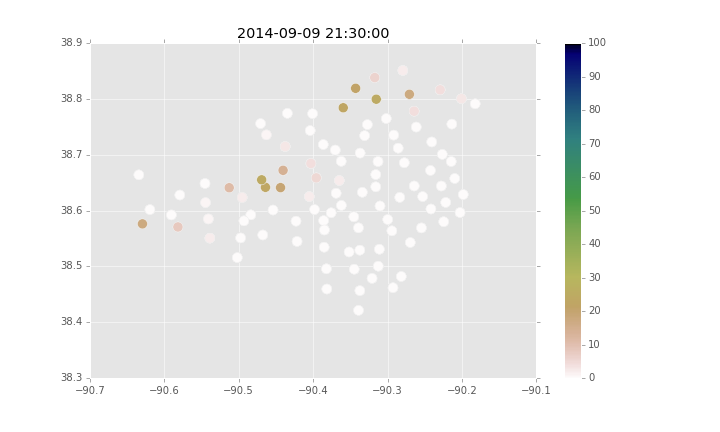
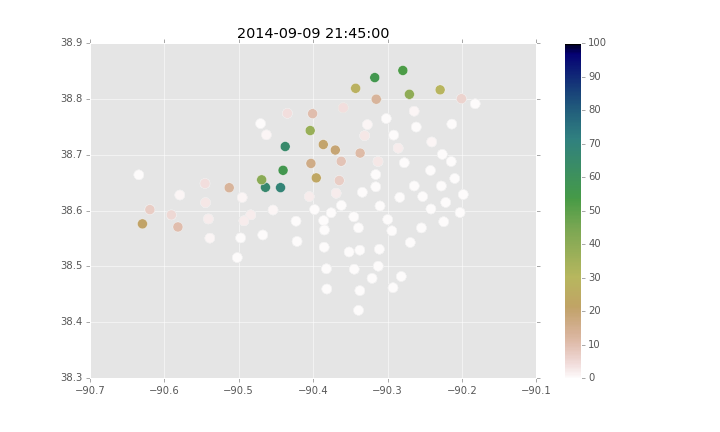
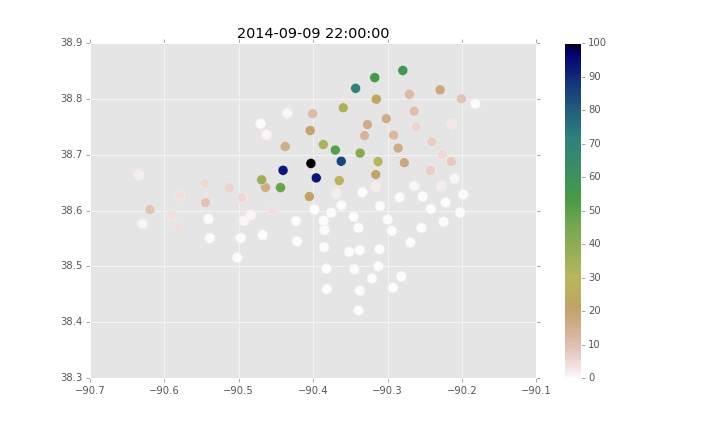
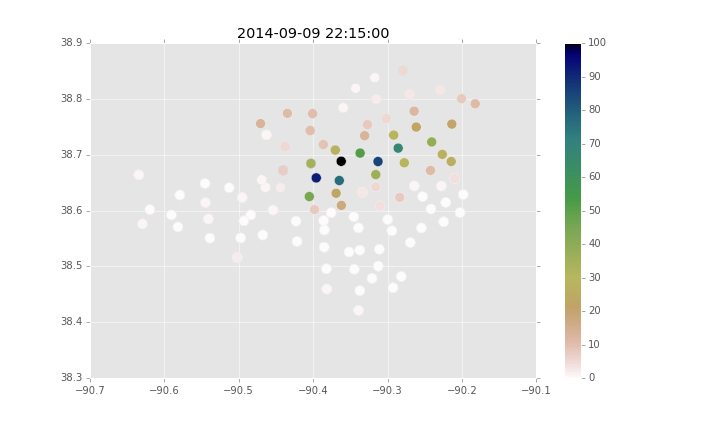
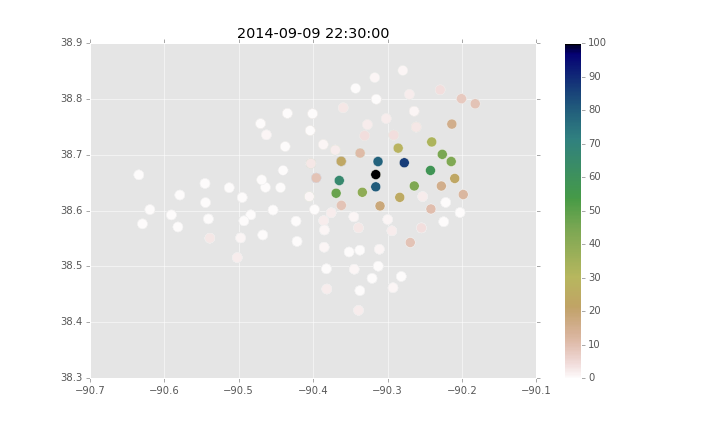
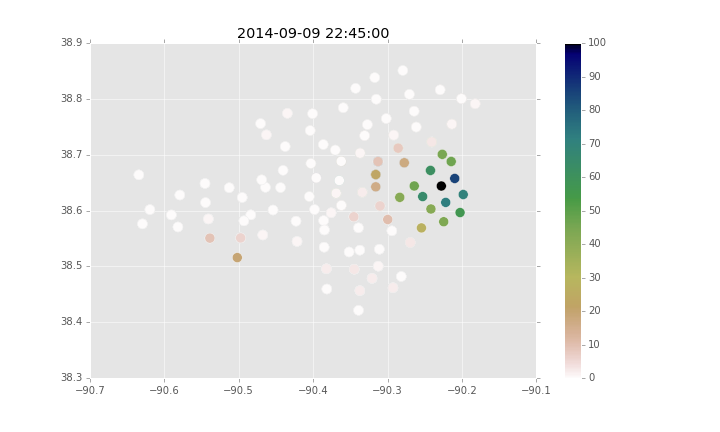
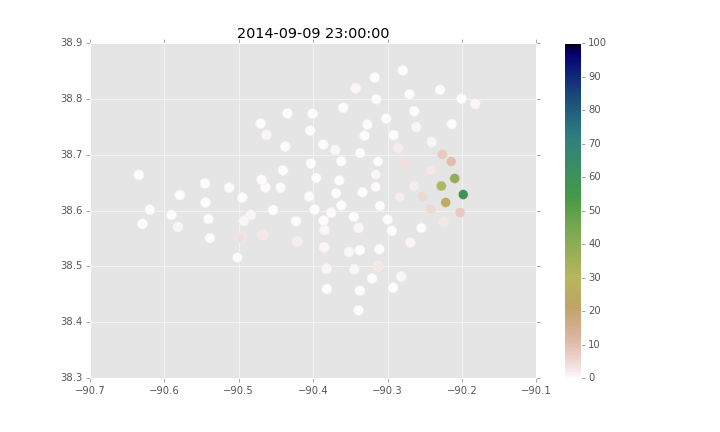
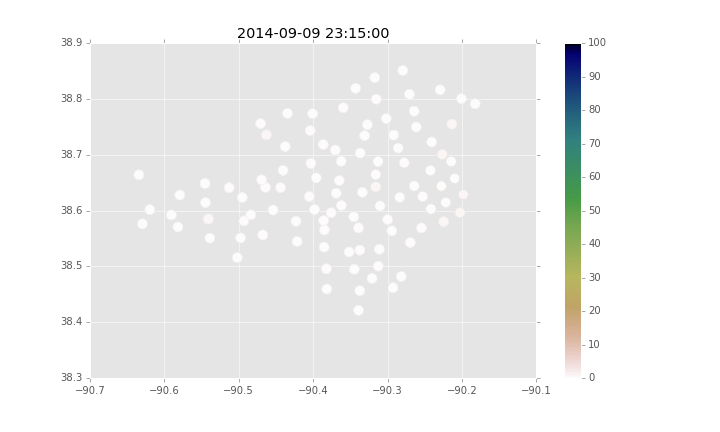
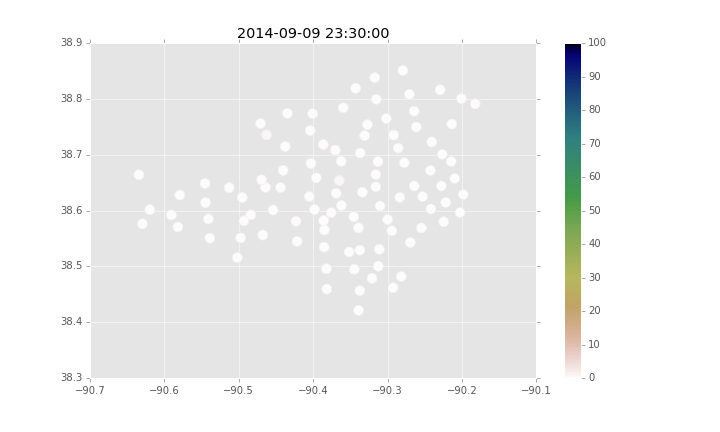
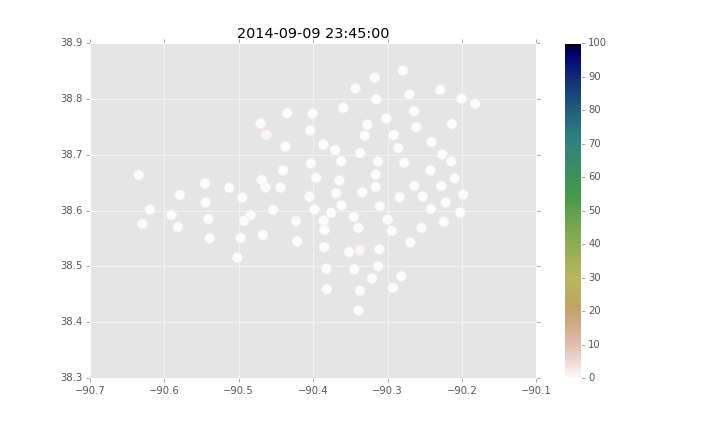
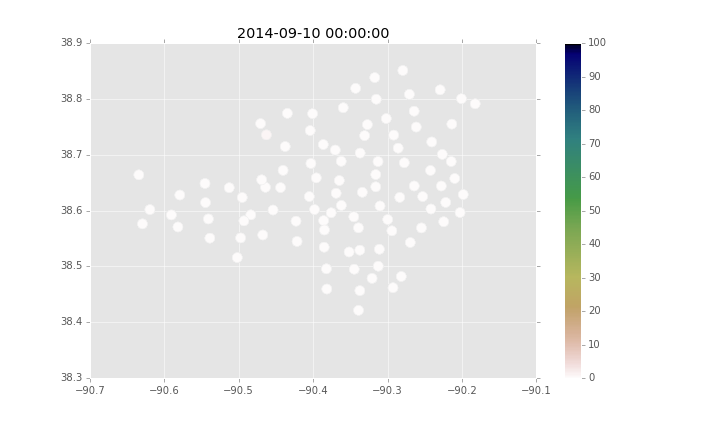
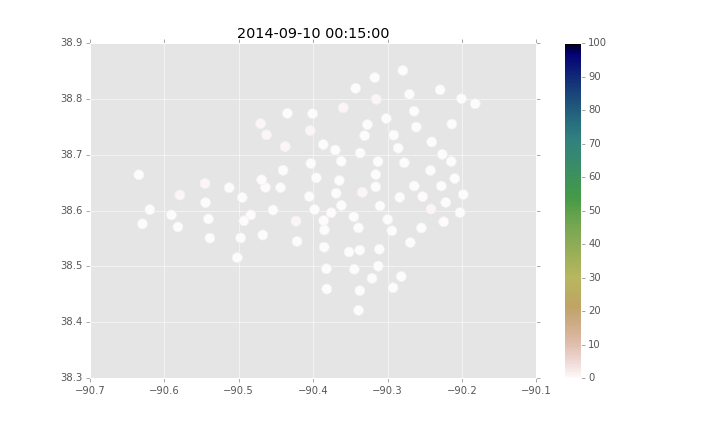
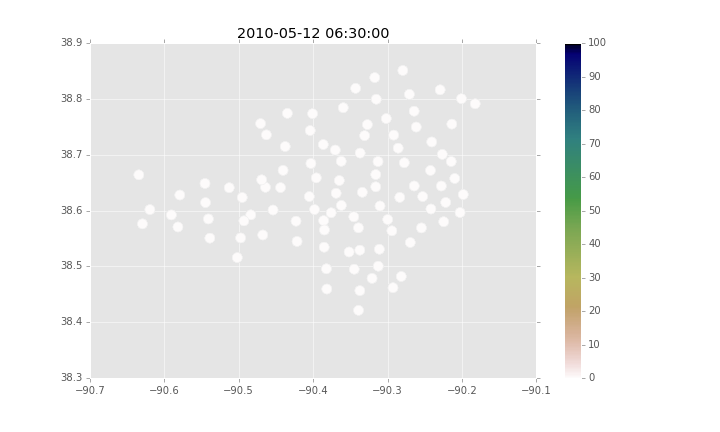
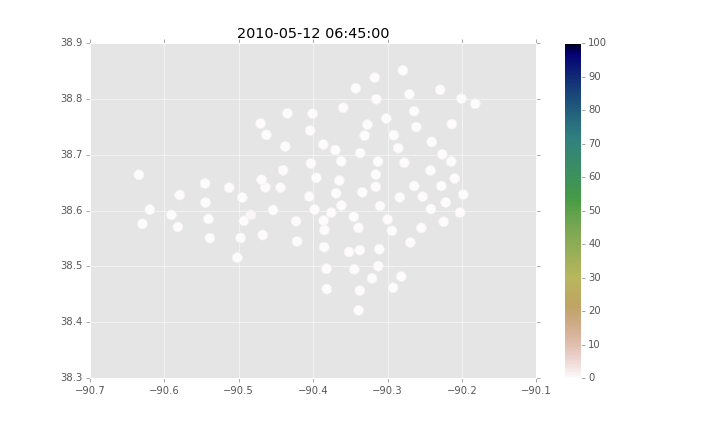
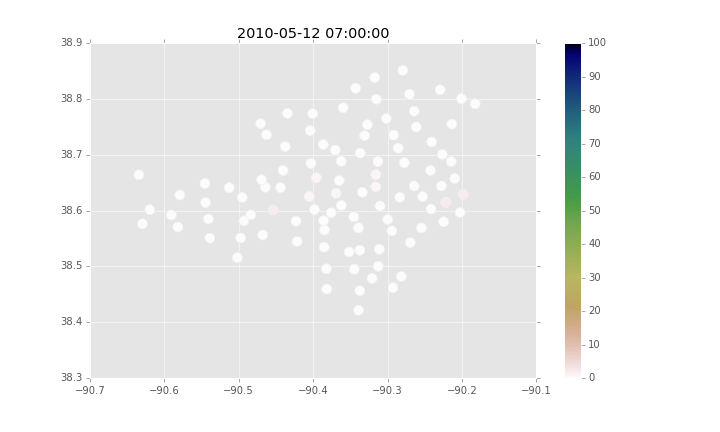
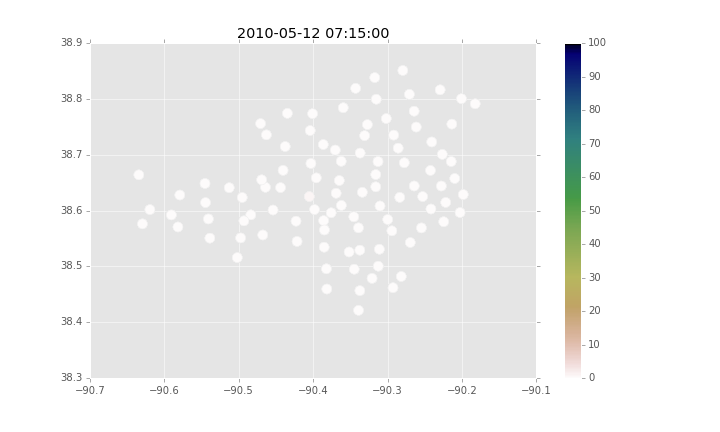
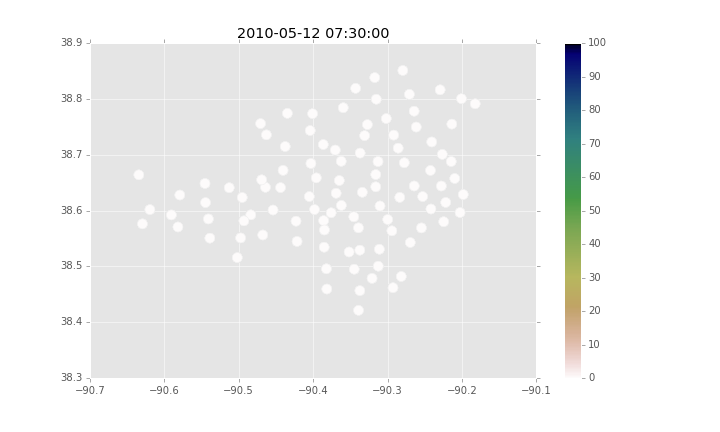
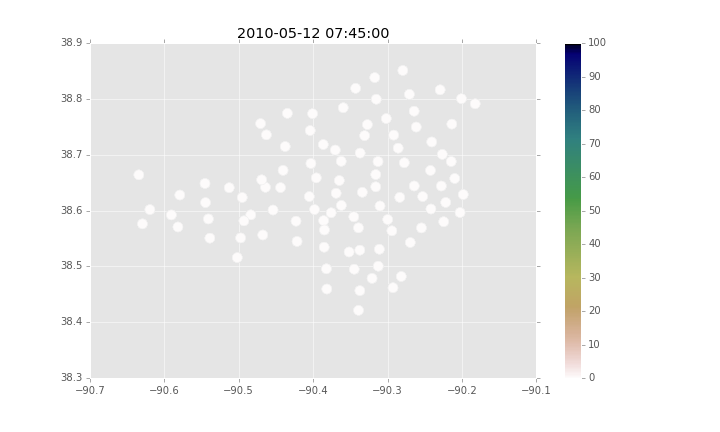
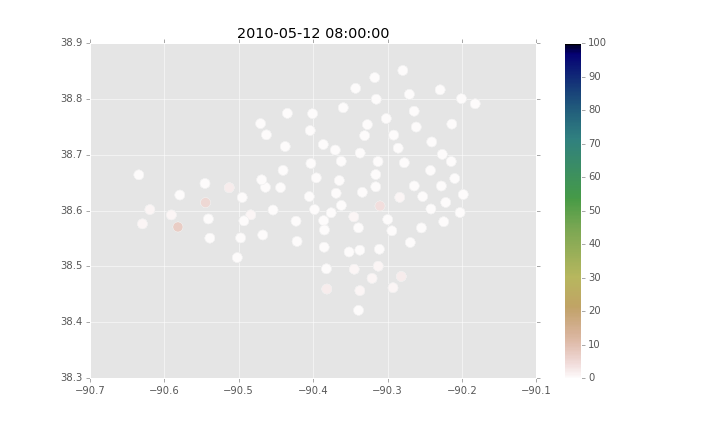
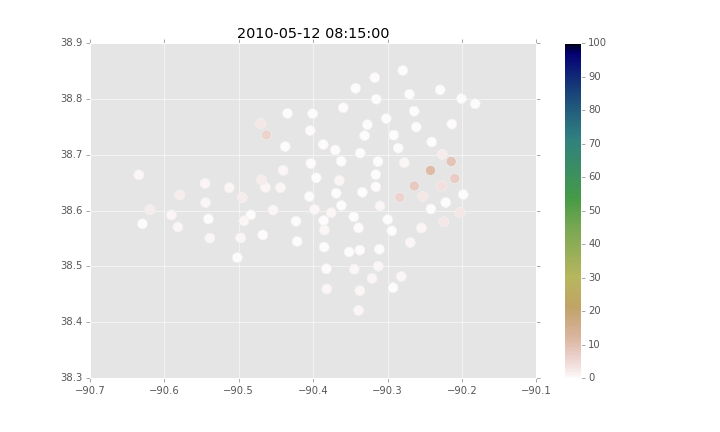
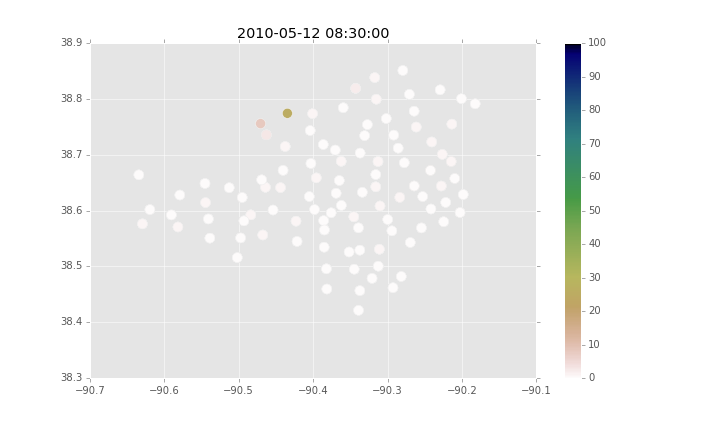
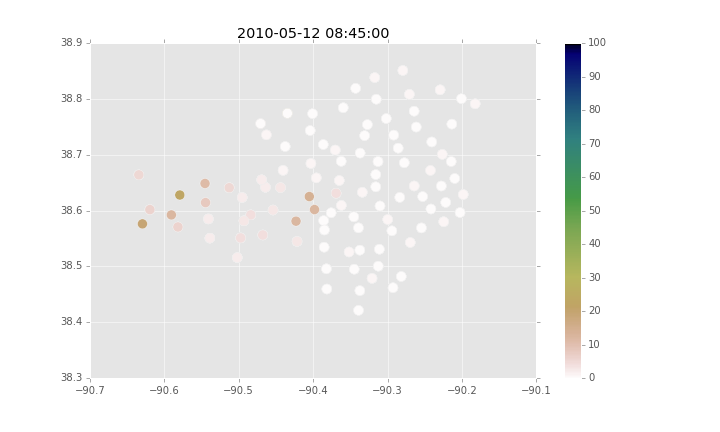
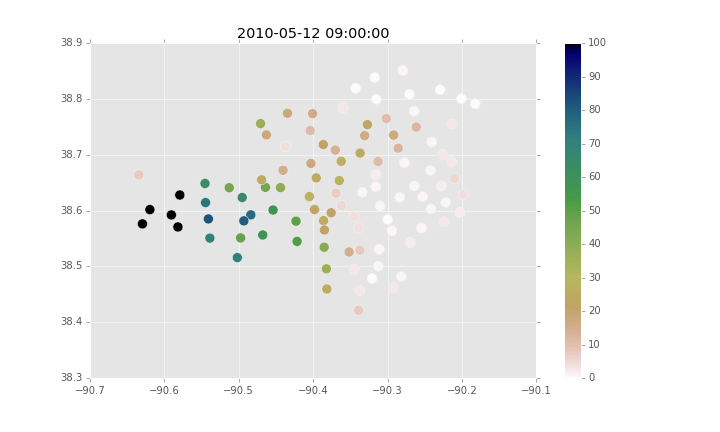
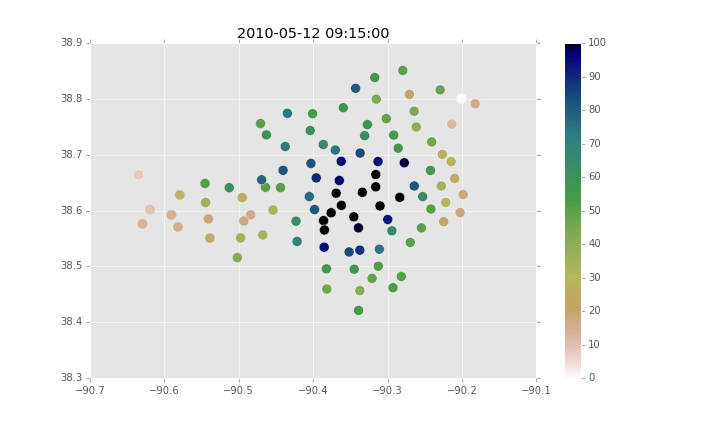
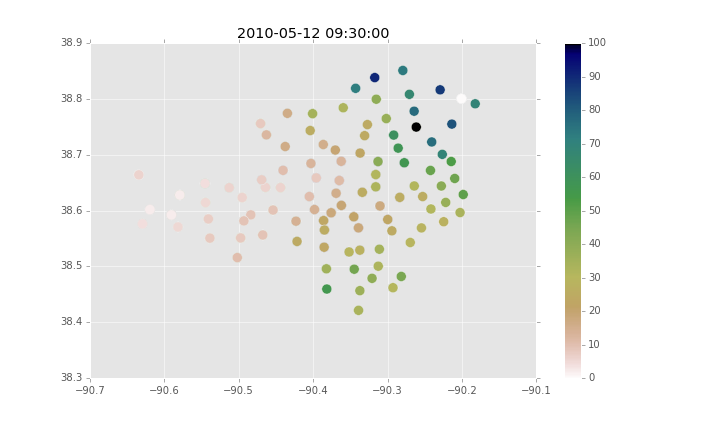
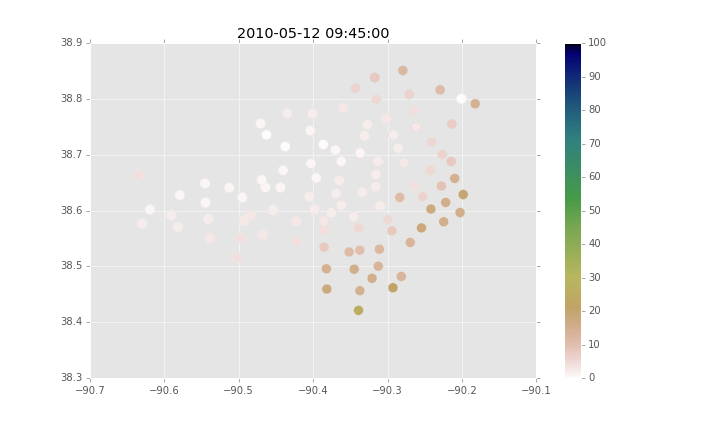
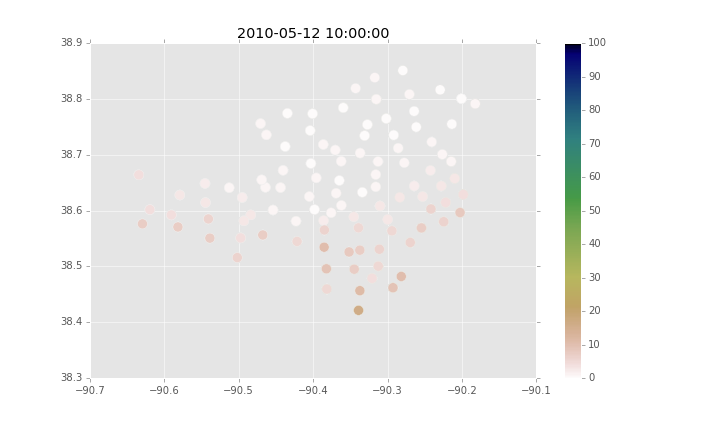
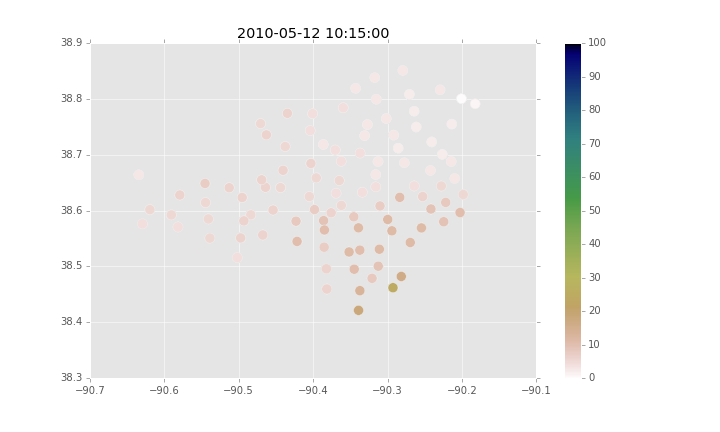

In [231]:
movie(z)

#### Import the r stuff

[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]



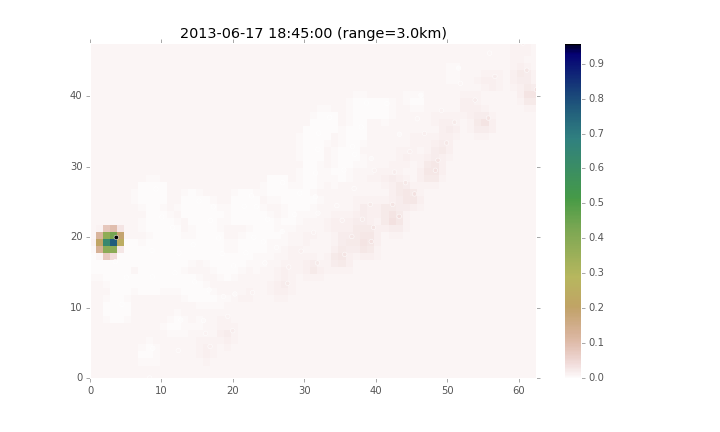
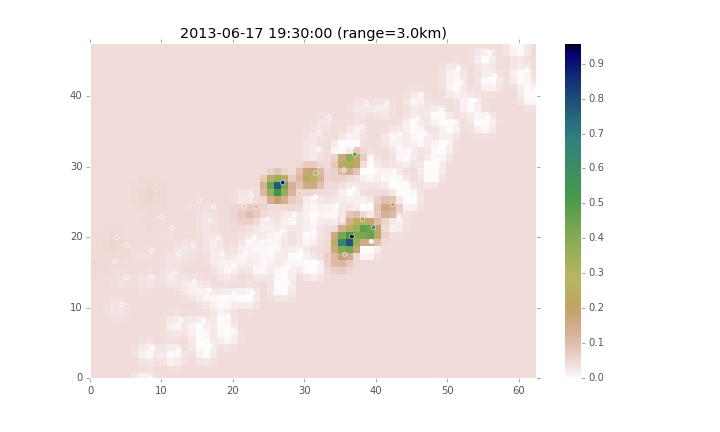
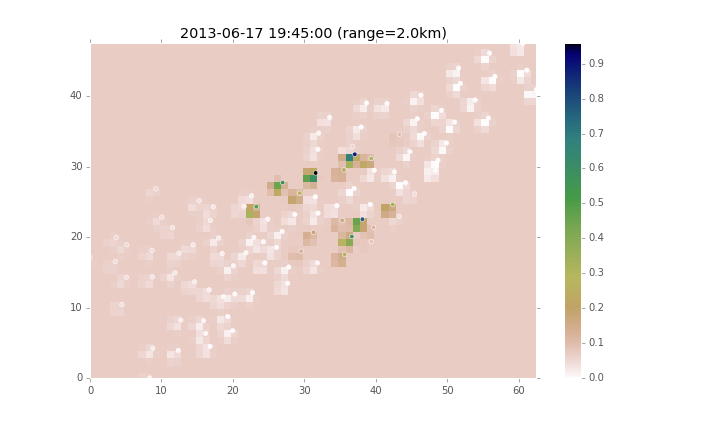
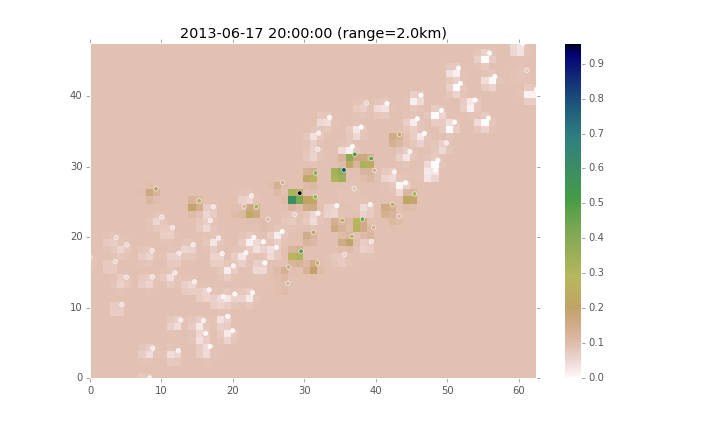
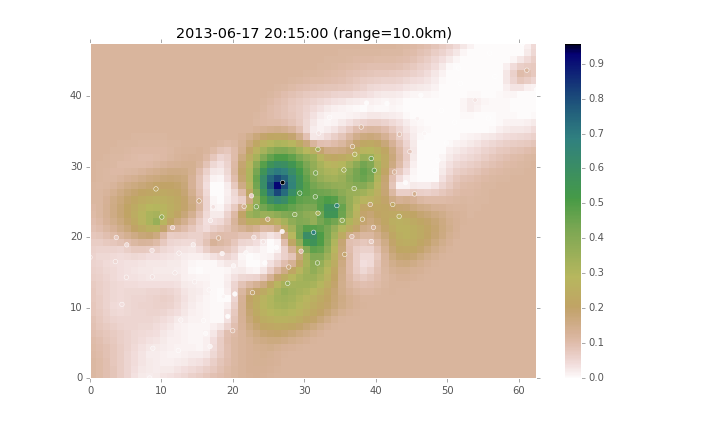
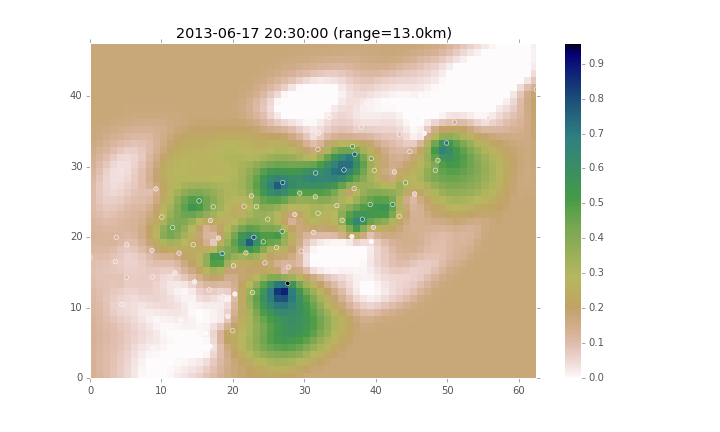
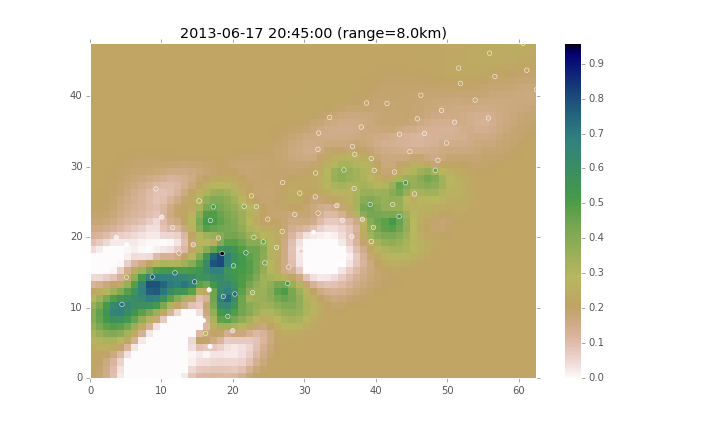
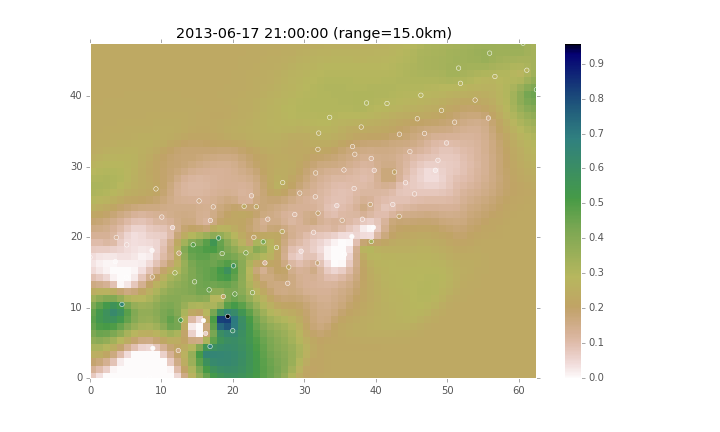
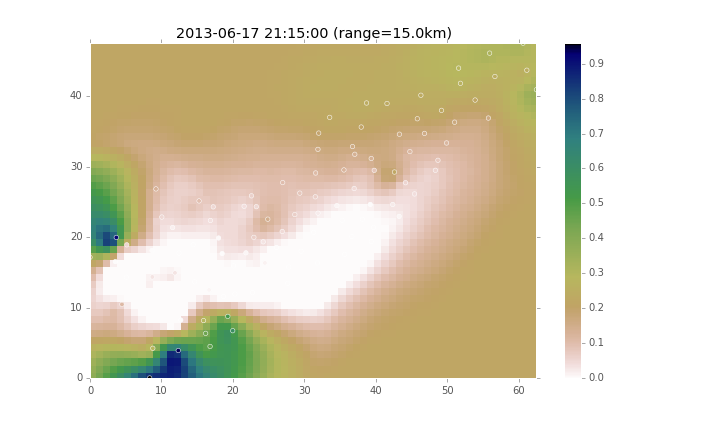
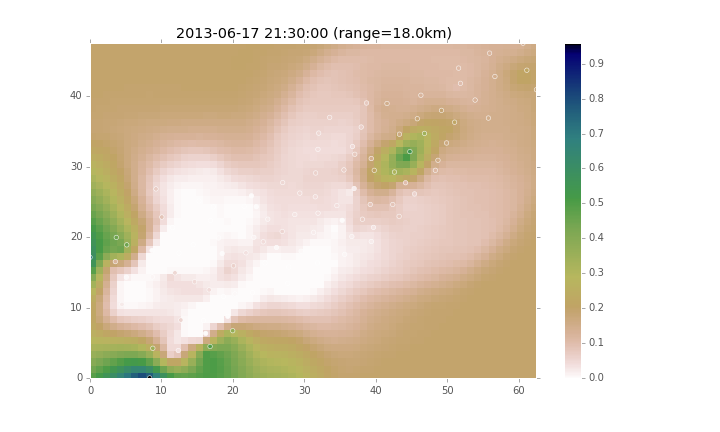
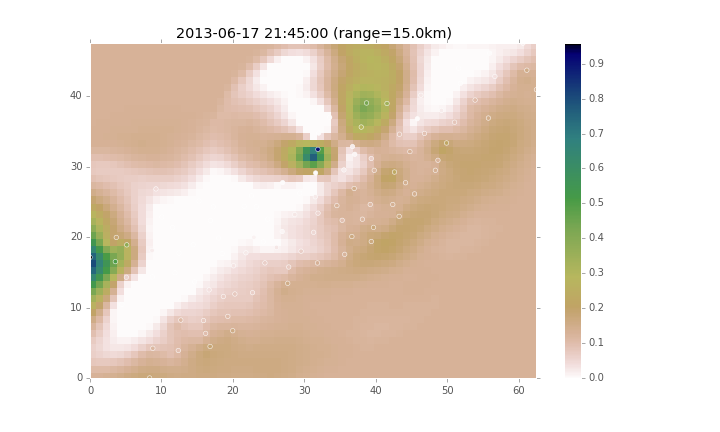
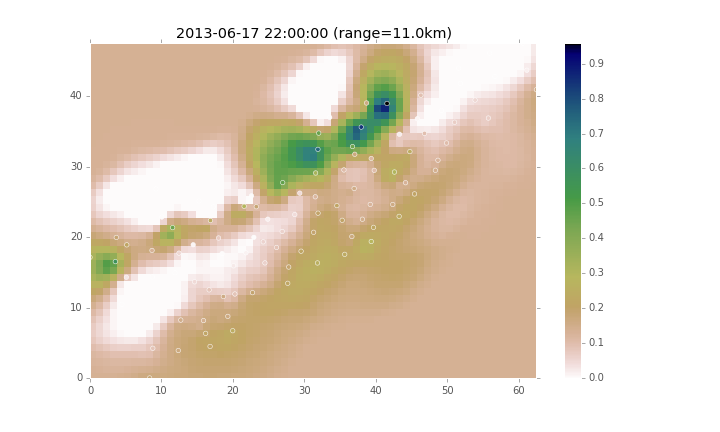
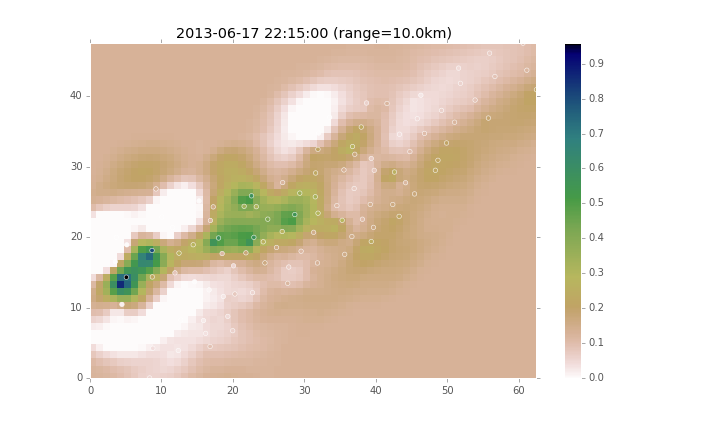
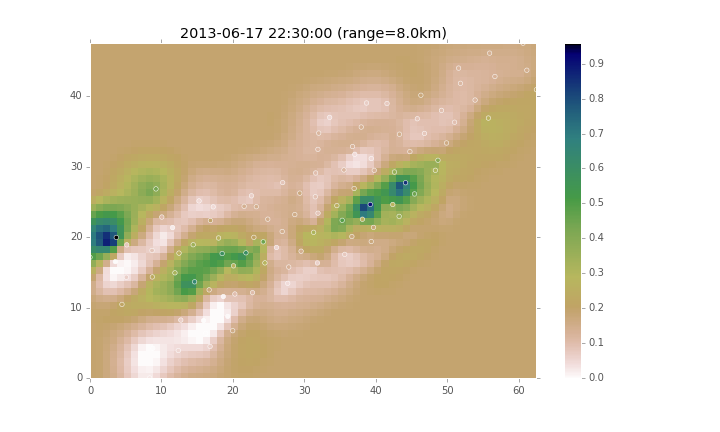
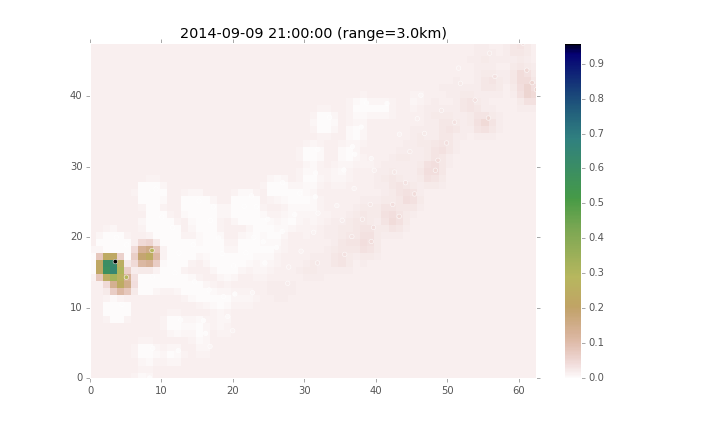
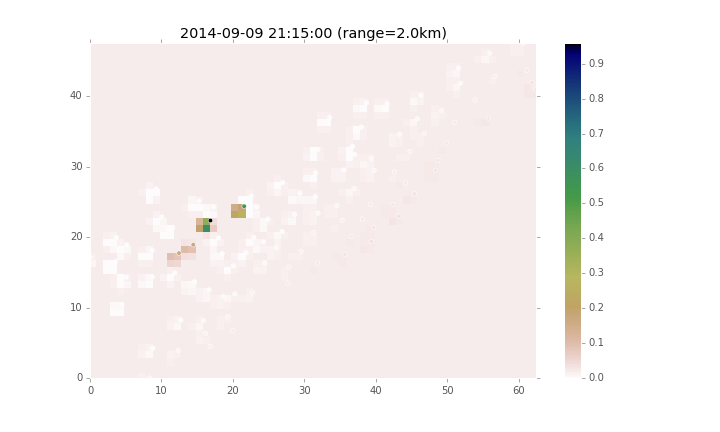
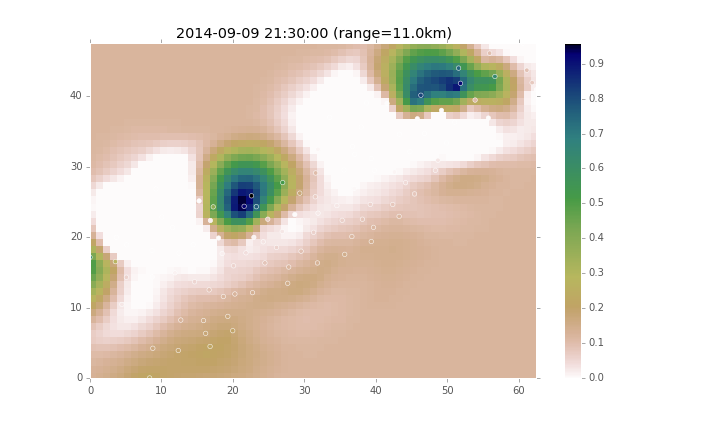
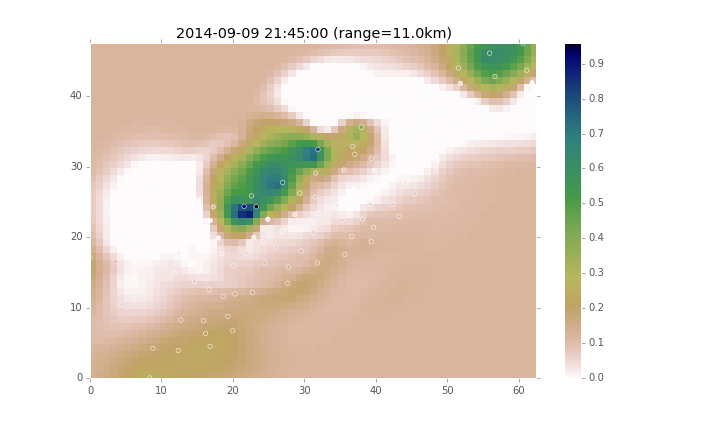
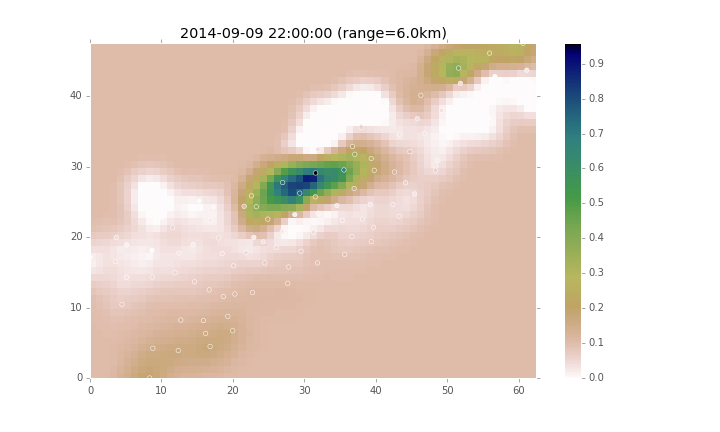
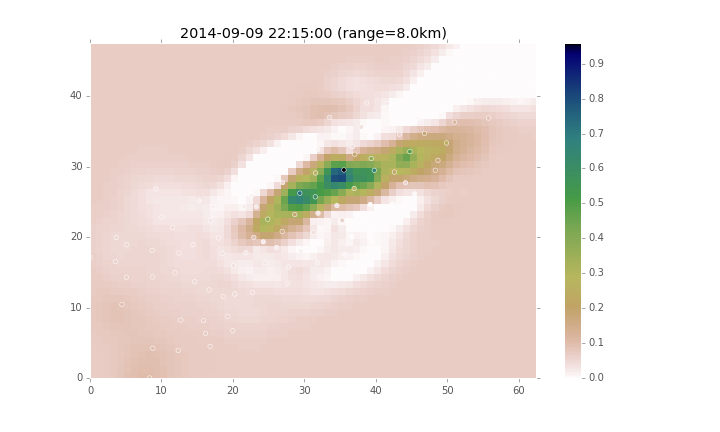
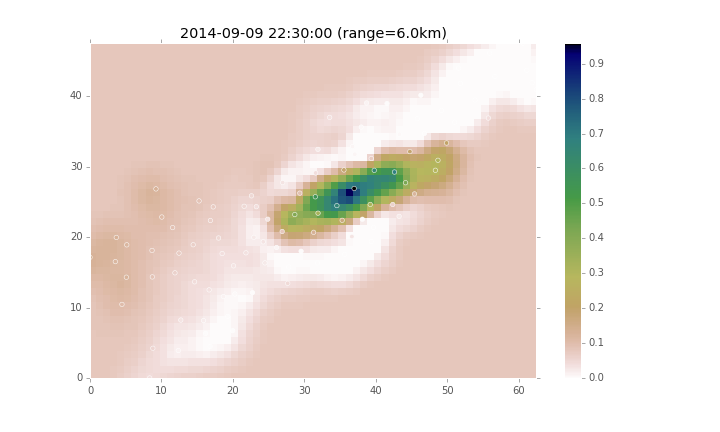
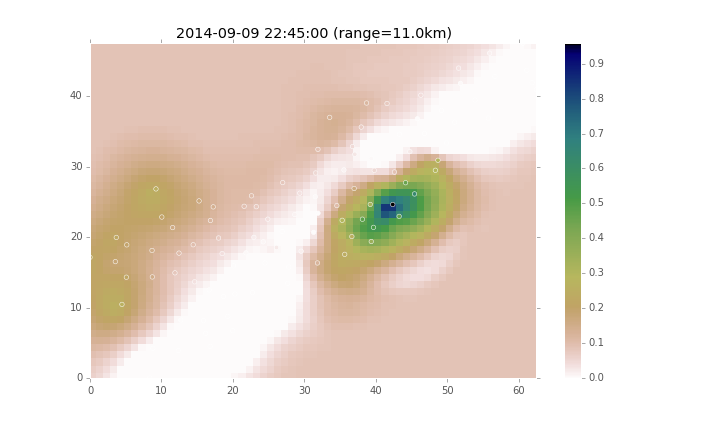
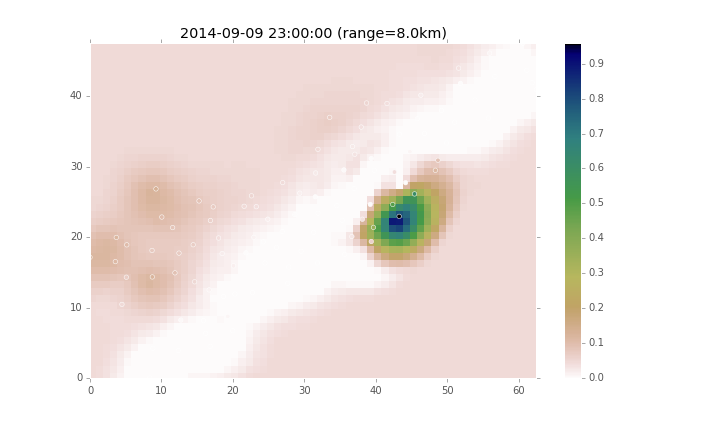
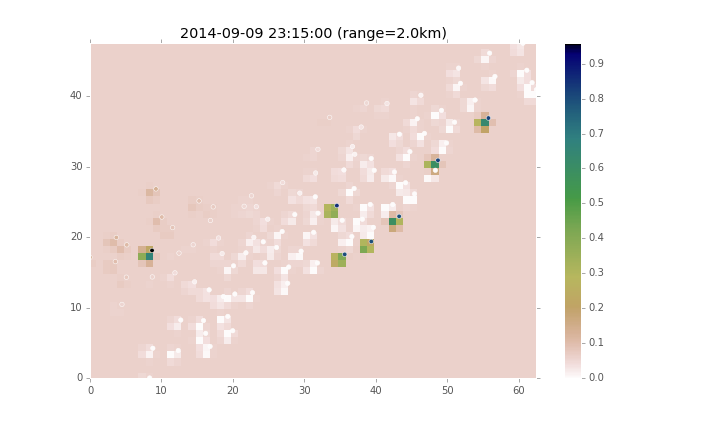
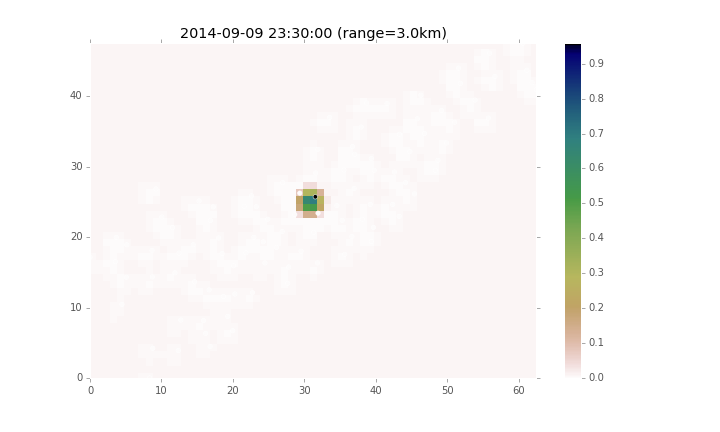
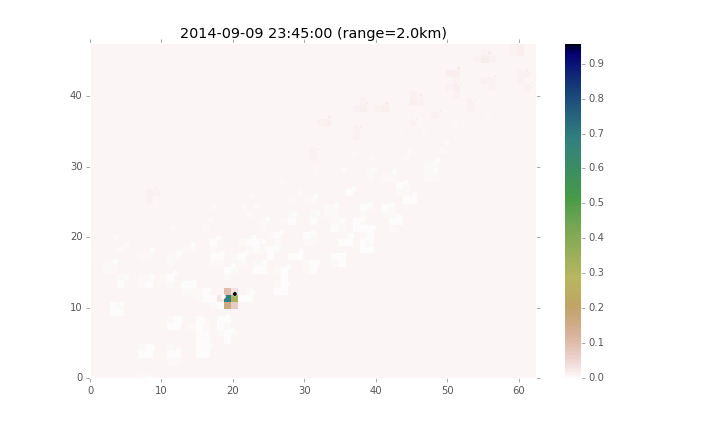
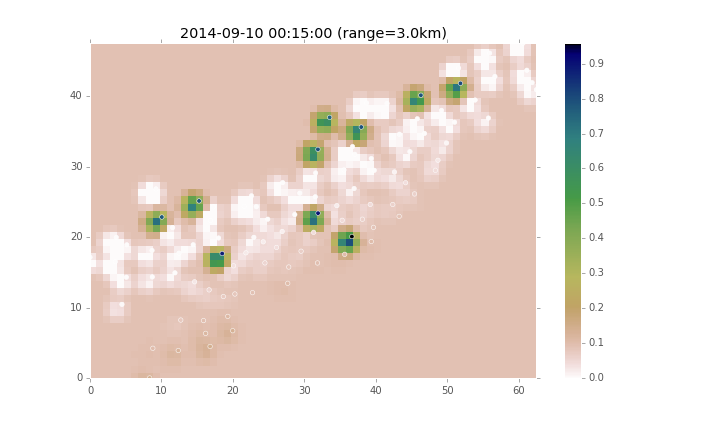
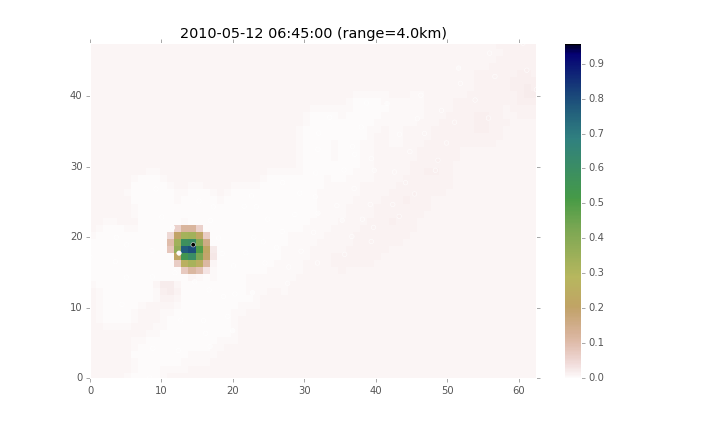
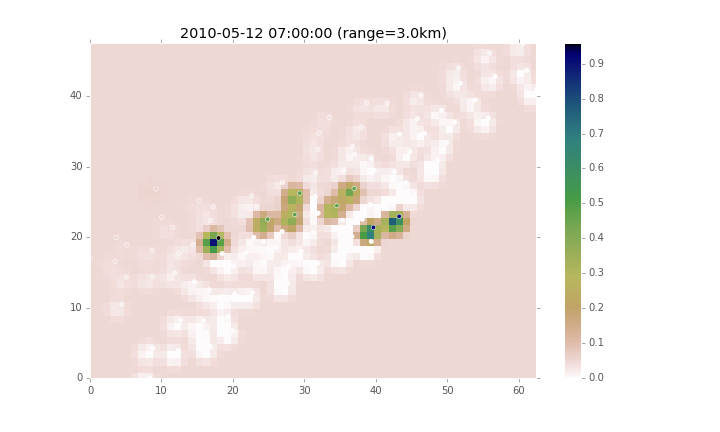
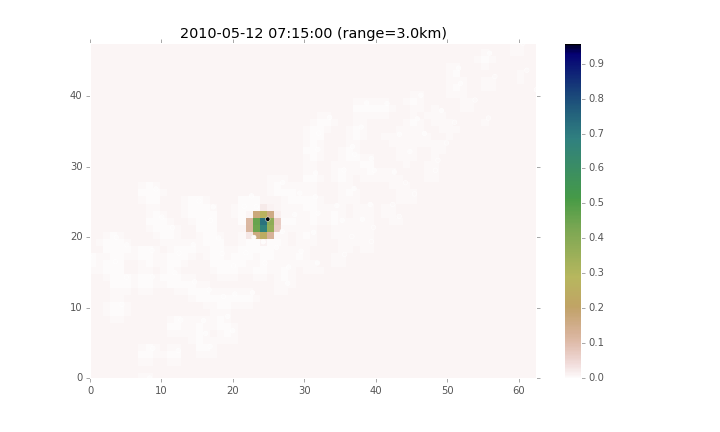
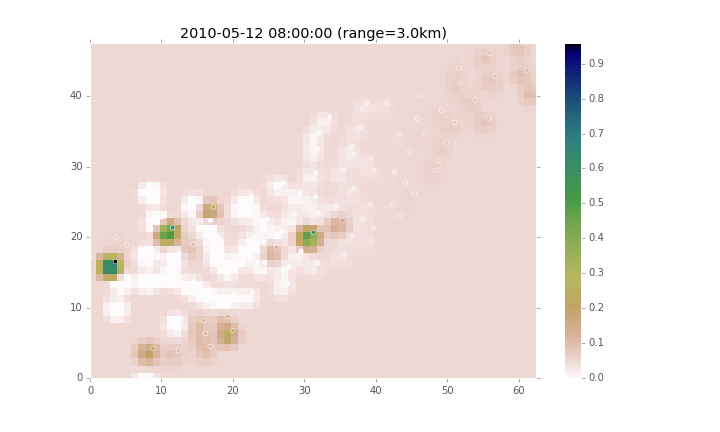
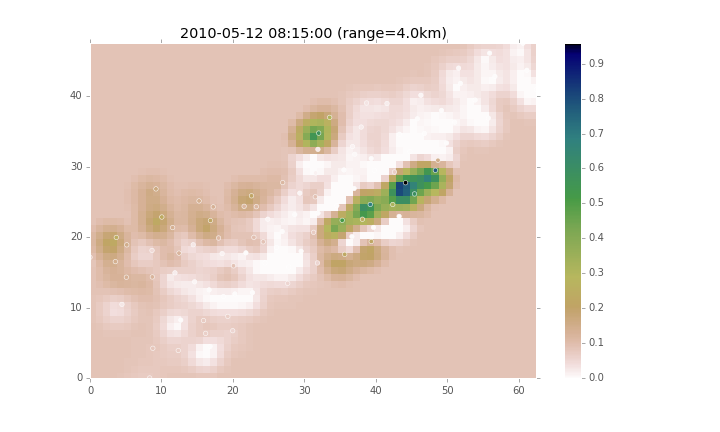
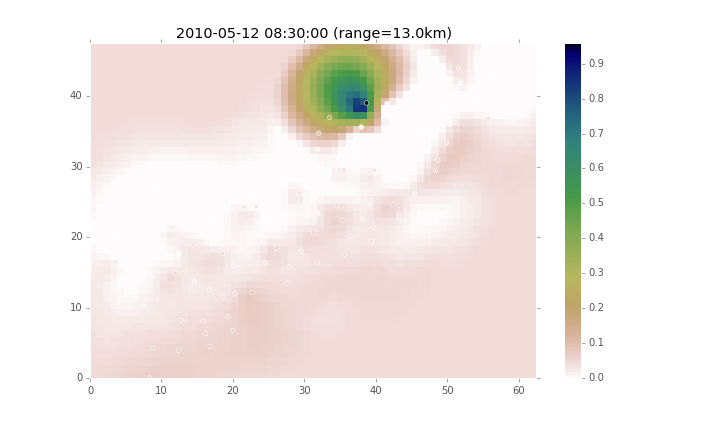
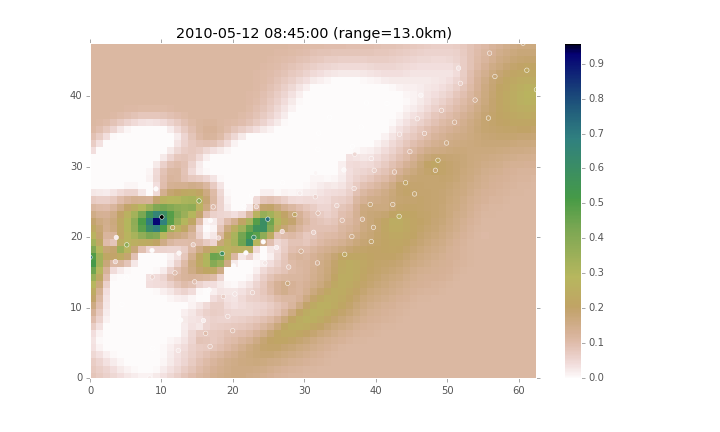
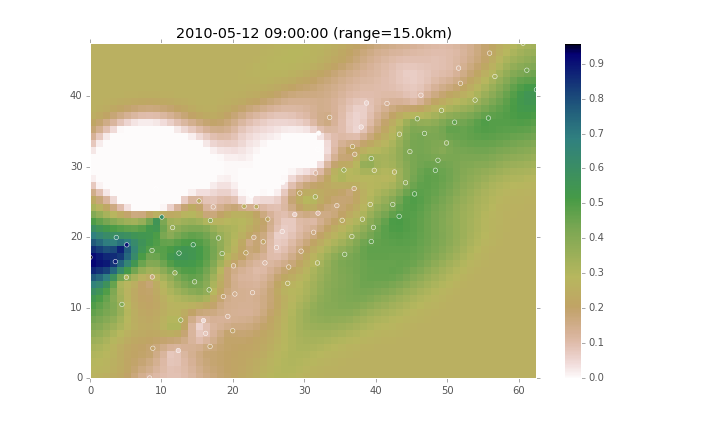
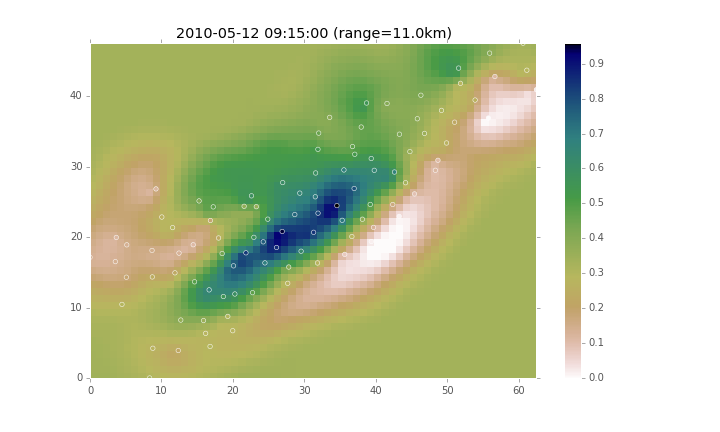
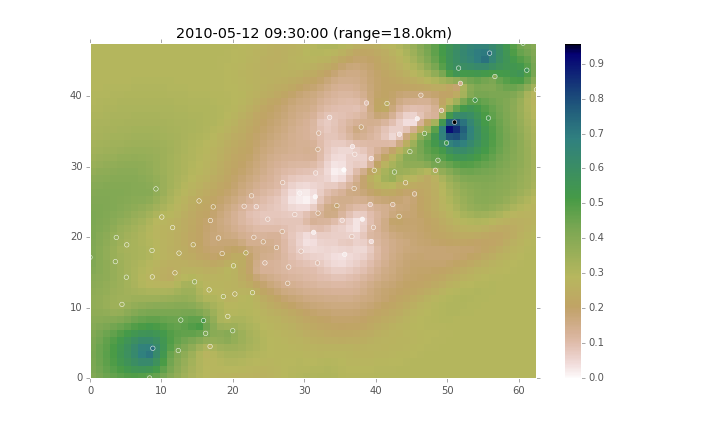
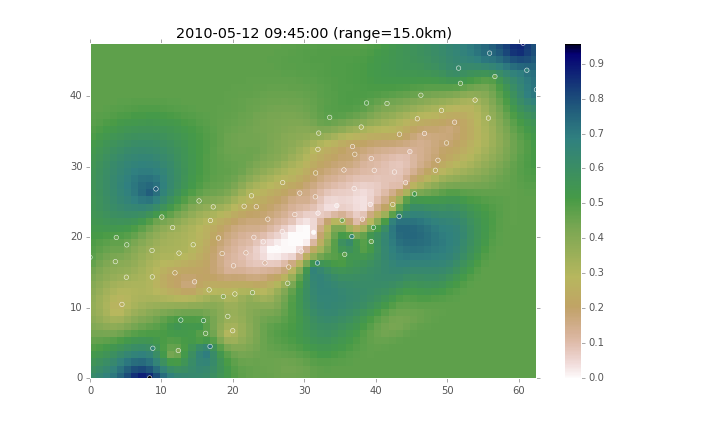
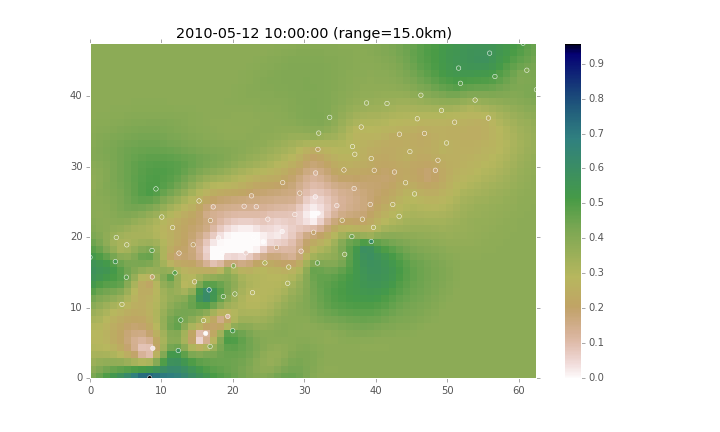
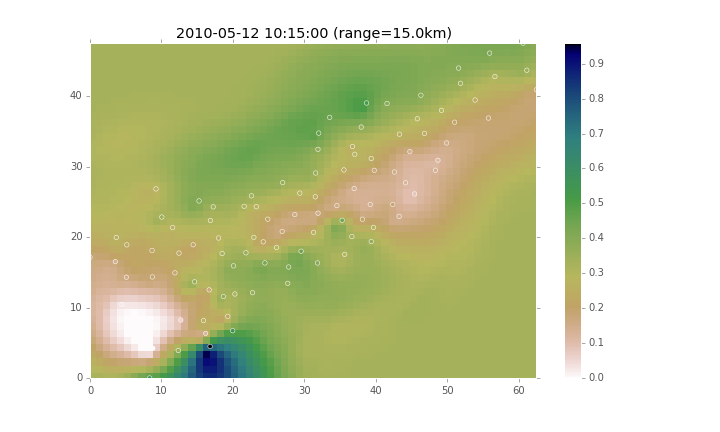

In [412]:
fig, ax = plt.subplots(1,1,figsize= (10,6))
sc = krige(res, 5, animated=True, ax=ax)
fig.colorbar(sc)

def animate(i):
    global res
    krige(res, i+5, animated=True, ax=ax)
animation.FuncAnimation(fig, animate, frames=len(res.columns[5:]), interval=300, blit=True)